
Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
Perform the following tasks:
1.  Pre-process the dataset.
2.  Identify outliers.
3.  Check the correlation.
4.  Implement linear regression and random forest regression models.
5.  Evaluate the models and compare their respective scores like R2, RMSE, etc.

Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

# Importing Libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import haversine as hs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Loading The Dataset

In [2]:
df = pd.read_csv('./uber.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


# Data Preprocessing

In [5]:
df = df.drop(['Unnamed: 0', 'key'], axis = 1)

In [6]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime,
                                    errors='coerce')

In [8]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [9]:
df= df.assign(hour = df.pickup_datetime.dt.hour,
              day= df.pickup_datetime.dt.day,
              month = df.pickup_datetime.dt.month,
              year = df.pickup_datetime.dt.year,
              dayofweek = df.pickup_datetime.dt.dayofweek)

In [10]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [11]:
df = df.drop('pickup_datetime',axis=1)
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
hour                   int64
day                    int64
month                  int64
year                   int64
dayofweek              int64
dtype: object

# Exploratory Data Analysis

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

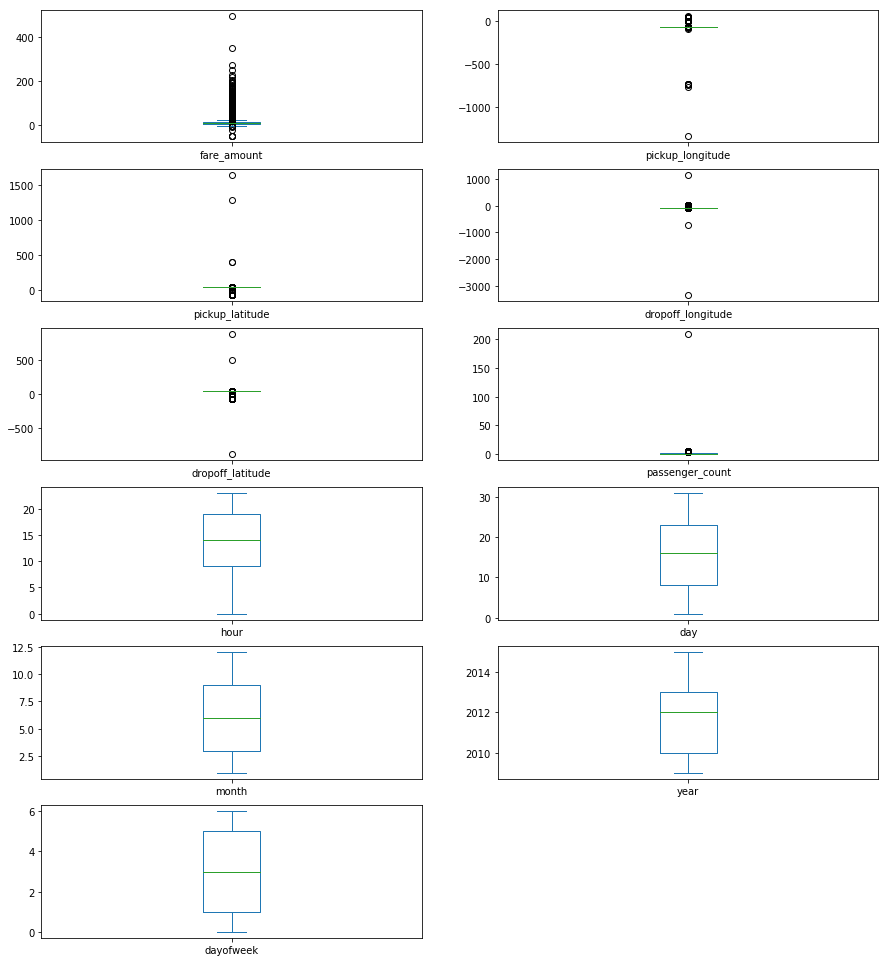

In [12]:
df.plot(kind = "box",subplots = True,layout = (7,2),
        figsize=(15,20))

In [13]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

In [14]:
df = treat_outliers_all(df , df.iloc[: , 0::])

In [15]:
travel_dist = []
for pos in range(len(df['pickup_longitude'])):
    long1,lati1,long2,lati2 = [df['pickup_longitude'][pos],
                               df['pickup_latitude'][pos],
                               df['dropoff_longitude'][pos],
                               df['dropoff_latitude'][pos]]
    loc1=(lati1,long1)
    loc2=(lati2,long2)
    c = hs.haversine(loc1,loc2)
    travel_dist.append(c)
print(travel_dist)
df['dist_travel_km'] = travel_dist
df.head()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.116088


In [16]:
df= df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]
print('Observations left in the dataset:', df.shape)

Observations left in the dataset: (199999, 12)


In [17]:
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) |
                               (df.pickup_latitude < -90) |
                               (df.dropoff_latitude > 90) |
                               (df.dropoff_latitude < -90) |
                               (df.pickup_longitude > 180) |
                               (df.pickup_longitude < -180) |
                               (df.dropoff_longitude > 90) |
                               (df.dropoff_longitude < -90)]

In [18]:
df.drop(incorrect_coordinates, inplace = True,
        errors = 'ignore')

/home/rmdstic/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
corr = df.corr()
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.154056,-0.110856,0.218681,-0.125874,0.015798,-0.023605,0.004552,0.030815,0.141271,0.013664,0.786381
pickup_longitude,0.154056,1.000000,0.259492,0.425622,0.073309,-0.013202,0.011590,-0.003194,0.001168,0.010193,-0.024645,0.048423
pickup_latitude,-0.110856,0.259492,1.000000,0.048889,0.515736,-0.012879,0.029691,-0.001544,0.001561,-0.014247,-0.042304,-0.073385
dropoff_longitude,0.218681,0.425622,0.048889,1.000000,0.245670,-0.009304,-0.046560,-0.004008,0.002392,0.011347,-0.003337,0.155200
dropoff_latitude,-0.125874,0.073309,0.515736,0.245670,1.000000,-0.006329,0.019765,-0.003498,-0.001191,-0.009595,-0.031932,-0.052657
passenger_count,0.015798,-0.013202,-0.012879,-0.009304,-0.006329,1.000000,0.020260,0.002699,0.010353,-0.009743,0.048542,0.009916
hour,-0.023605,0.011590,0.029691,-0.046560,0.019765,0.020260,1.000000,0.004664,-0.003924,0.002162,-0.086956,-0.035679
day,0.004552,-0.003194,-0.001544,-0.004008,-0.003498,0.002699,0.004664,1.000000,-0.017358,-0.012165,0.005609,0.001738
month,0.030815,0.001168,0.001561,0.002392,-0.001191,0.010353,-0.003924,-0.017358,1.000000,-0.115860,-0.008785,0.010046
year,0.141271,0.010193,-0.014247,0.011347,-0.009595,-0.009743,0.002162,-0.012165,-0.115860,1.000000,0.006116,0.022282


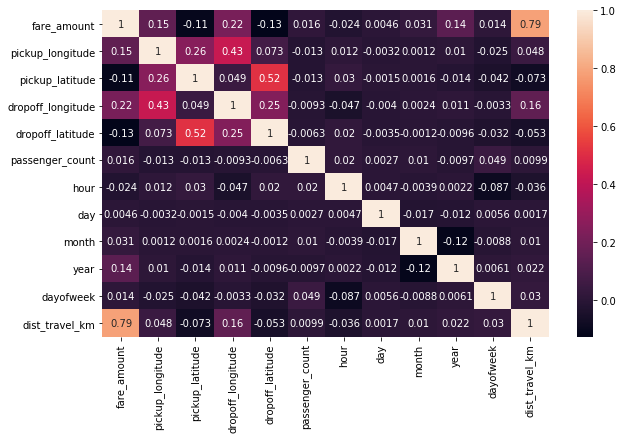

In [20]:
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(),annot = True)

# Model Building

In [21]:
x = df[['pickup_longitude','pickup_latitude','dropoff_longitude',
        'dropoff_latitude','passenger_count','hour','day','month',
        'year', 'dayofweek', 'dist_travel_km']]
y = df['fare_amount']

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
# regression.intercept_     write only if asked explicitly in statement

In [24]:
# regression.coef_   write only if asked explicitly in statement

In [29]:
prediction = regression.predict(x_test)
print('Prediction for x:\n', prediction,'\n')
print('Fare Amount test data:\n', y_test)

Prediction for x:
 [ 5.99025871 22.92134968  6.51048822 ...  6.08490903  6.29056439
 21.49547168] 

Fare Amount test data:
 169758    22.25
149688    22.25
137543     6.50
48637      8.90
91311     11.30
          ...  
154137     5.70
185635     5.70
136493     4.50
191237     4.90
64781     22.25
Name: fare_amount, Length: 66000, dtype: float64


In [33]:
print('R2 Score:\n',r2_score(y_test, prediction))

R2 Score:
 0.663982380120131


In [34]:
MSE = mean_squared_error(y_test, prediction)
print('Mean Squared Error:\n', MSE)

Mean Squared Error:
 9.96548195777693


In [36]:
RMSE = np.sqrt(MSE)
print('Root Mean Squared Error:\n', RMSE)

Root Mean Squared Error:
 3.1568151605339407


In [37]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)

/home/rmdstic/anaconda3/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

# Results

In [38]:
y_pred = rf.predict(x_test)
print('Predictions for Fare Amount:\n', y_pred)

/home/rmdstic/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/home/rmdstic/anaconda3/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


Predictions for Fare Amount:
 [ 5.676  21.4625  5.467  ...  5.911   5.288  21.8675]


In [39]:
R2_Random = r2_score(y_test, y_pred)
print('Random R2 Score:\n', R2_Random)

Random R2 Score:
 0.7935897292145135


In [40]:
MSE_Random = mean_squared_error(y_test, y_pred)
print('Random Mean Squared Error:\n', MSE_Random)

Random Mean Squared Error:
 6.121636806272287


In [42]:
RMSE_Random = np.sqrt(mean_squared_error(y_test, y_pred))
print('Random Root Mean Squared Error:\n', RMSE_Random)

Random Root Mean Squared Error:
 2.4741941731142054


In [44]:
# DONE DONE